In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

D:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


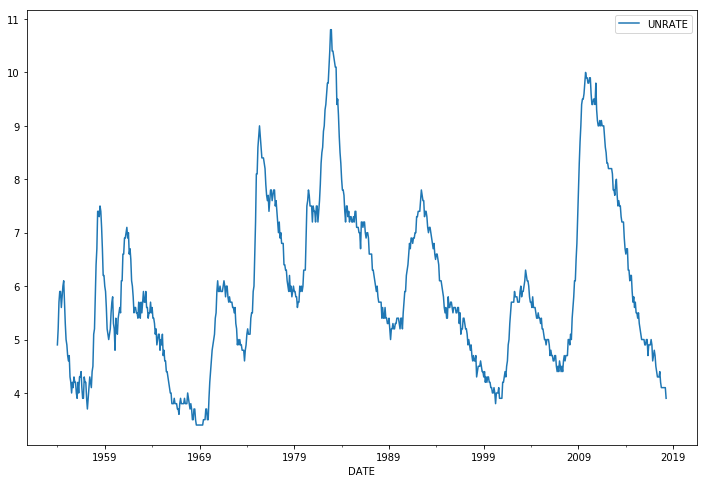

In [2]:
#get a general idea about the figure
from pandas_datareader.data import DataReader
endog = DataReader('UNRATE', 'fred', start='1954-01-01')
endog.plot(figsize=(12,8))

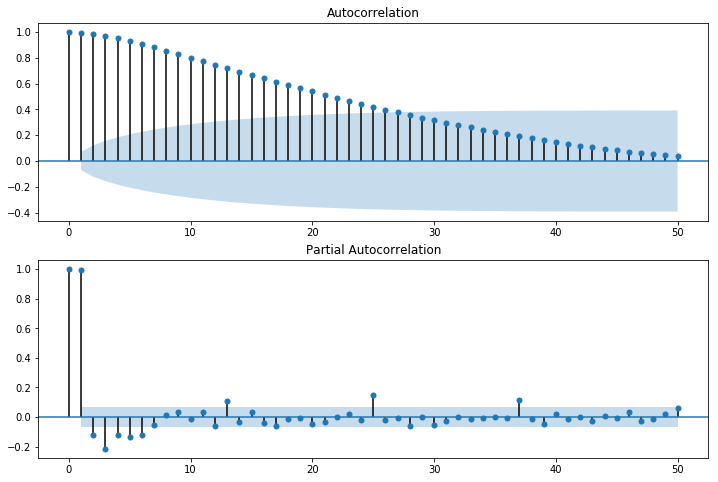

In [3]:
#Have a look at the ACF and PACF really quick
#Have an idea about the cycles in this problem
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(endog.values.squeeze(), lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(endog, lags=50, ax=ax2)

D:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
D:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


                              ARMA Model Results                              
Dep. Variable:                 UNRATE   No. Observations:                  772
Model:                    ARMA(12, 0)   Log Likelihood                 254.709
Method:                       css-mle   S.D. of innovations              0.173
Date:                Thu, 31 May 2018   AIC                           -481.418
Time:                        11:24:22   BIC                           -416.332
Sample:                    01-01-1954   HQIC                          -456.373
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.7964      0.419     13.821      0.000       4.974       6.618
ar.L1.UNRATE      1.0448      0.036     29.077      0.000       0.974       1.115
ar.L2.UNRATE      0.1449      0.052     

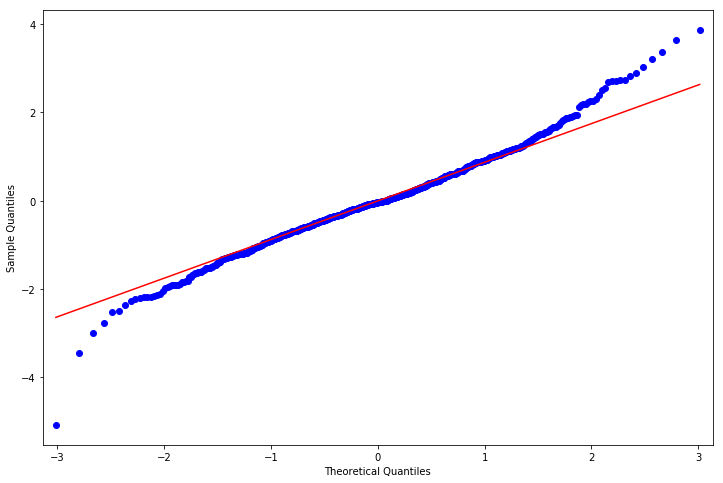

In [10]:
#Test if the resid satisfies normal distribution assumption
arma_mod12 = sm.tsa.ARMA(endog, (12,0)).fit(disp=False)
resid = arma_mod12.resid
stats.normaltest(resid)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)
print(arma_mod12.summary())

D:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


2009-01-01    7.425624
2009-02-01    7.613070
2009-03-01    7.708776
2009-04-01    7.861363
2009-05-01    7.955737
2009-06-01    8.017298
2009-07-01    8.058425
2009-08-01    8.040739
2009-09-01    8.041175
2009-10-01    8.010585
2009-11-01    8.006419
2009-12-01    7.960639
2010-01-01    7.920556
2010-02-01    7.862667
2010-03-01    7.812847
2010-04-01    7.757280
2010-05-01    7.700653
2010-06-01    7.643024
2010-07-01    7.580474
2010-08-01    7.520930
2010-09-01    7.458396
2010-10-01    7.401021
2010-11-01    7.340946
2010-12-01    7.283690
2011-01-01    7.225515
2011-02-01    7.170022
2011-03-01    7.115462
2011-04-01    7.062694
2011-05-01    7.011503
2011-06-01    6.961488
                ...   
2017-07-01    5.838817
2017-08-01    5.836914
2017-09-01    5.835096
2017-10-01    5.833359
2017-11-01    5.831700
2017-12-01    5.830116
2018-01-01    5.828603
2018-02-01    5.827158
2018-03-01    5.825777
2018-04-01    5.824459
2018-05-01    5.823200
2018-06-01    5.821997
2018-07-01 

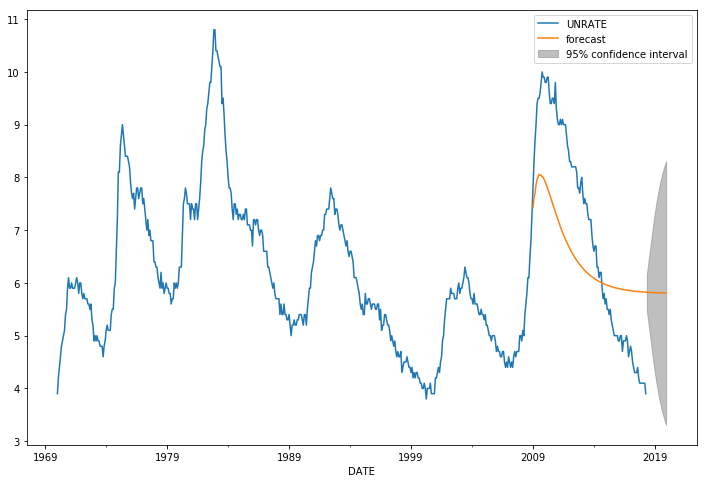

In [12]:
#Prediction
predict_unemployment_rate = arma_mod12.predict('2009-01-01', '2019', dynamic=True)
print(predict_unemployment_rate)
fig, ax = plt.subplots(figsize=(12, 8))
ax = endog.ix['1970':].plot(ax=ax)
fig = arma_mod12.plot_predict('2009-01-01', '2019', dynamic=True, ax=ax, plot_insample=False)